In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

sns.set_theme(style="whitegrid")

data = {'Task': [], 'Method': [], 'Occupancy Count':[]}
csvfiles = os.listdir('csvfiles')
for csvfile in csvfiles:
    df = pd.read_csv('csvfiles/' + csvfile)
    

    if 'team' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{team,cond}$'
    elif 'team' in csvfile:
        method = '$ELIGN_{team}$'
    elif 'adv' in csvfile and 'cond' in csvfile:
        method = '$ELIGN_{adv,cond}$'
    elif 'adv' in csvfile:
        method = '$ELIGN_{adv}$'

    if 'simple_spread' in csvfile:
        task = 'Coop nav (5v0)'
    elif 'hetero_spread' in csvfile:
        task = 'Hetero nav (6v0)'
    elif 'simple_adversary' in csvfile:
        task = 'Phy decep (4v2)'

    occupancy_count = df.Value.iloc[7].item()

    data['Task'].append(task)
    data['Method'].append(method)
    data['Occupancy Count'].append(occupancy_count)
df = pd.DataFrame(data)


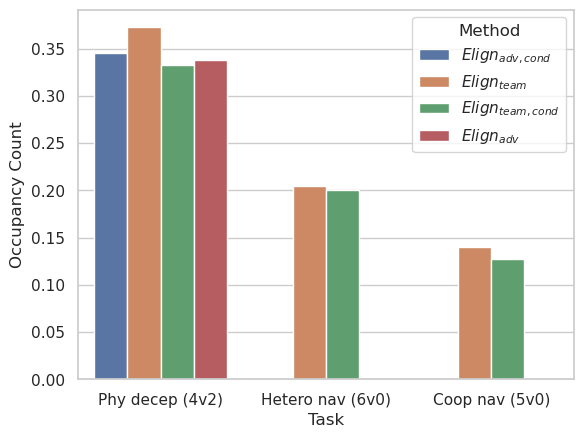

In [51]:
sns.barplot(data=df, x="Task", y="Occupancy Count", hue="Method")
plt.show()

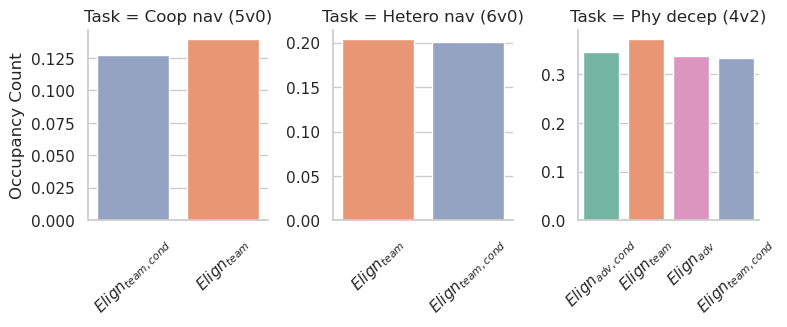

In [53]:
g = sns.catplot(x="Method", y="Occupancy Count", hue="Method", col='Task', data=df, kind="bar",
                height=3, aspect=0.9, col_order=['Coop nav (5v0)','Hetero nav (6v0)','Phy decep (4v2)'], 
                palette=sns.color_palette("Set2"), sharey=False, sharex=False, dodge=False);
g.set_xticklabels(rotation=45)
g.set(xlabel=None)
plt.savefig('figures/occupancy_count.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:
data = {
    'Task': ['Coop nav (5v0)','Hetero nav (6v0)','Phy decep (4v2)', 'Keep-away (4v4)'],
    'Method': ['$NewIM_{adv}$, $NewIM_{team}$, $NewIM_{both}$'],
    'Occupancy Count': [
        [0.3604288413220768],
        [0.6151199999999998],
        [0.5856581499855726, 0.6150303564356528, 0.1963741572797655],
        [0.09068, 0.06439999999999979, 0.25928000000000023]
    ]
}

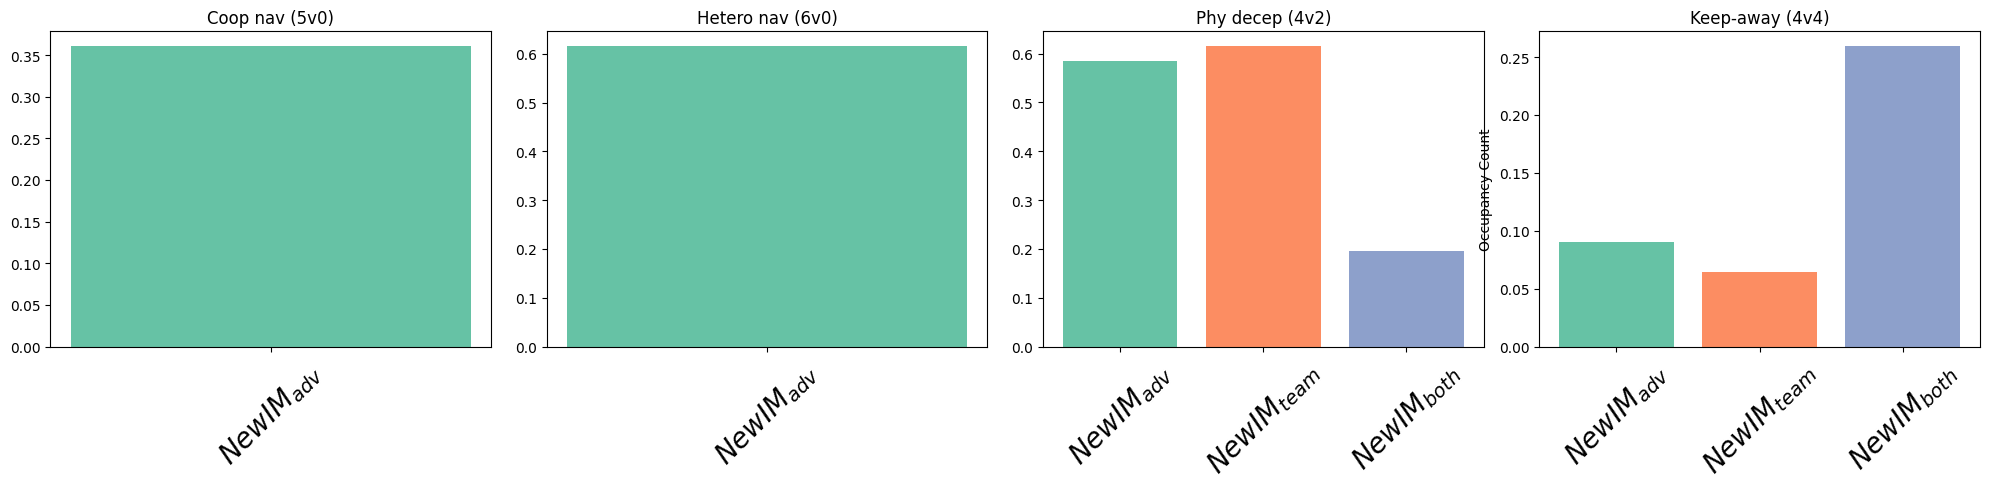

In [23]:
n_tasks = len(data['Task'])
n_methods = len(data['Method'][0].split(', '))
color_palette = sns.color_palette("Set2", n_methods)

fig, axs = plt.subplots(1, n_tasks, figsize=(5*n_tasks, 5)) # Change the subplot layout to 1 row and n_tasks columns

for i, (ax, task, counts) in enumerate(zip(axs, data['Task'], data['Occupancy Count'])):
    if i == 0:
        ax.set_ylabel('Occupancy Count', fontsize=20)
    ax.bar(range(len(counts)), counts, color=color_palette[:len(counts)])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(data['Method'][0].split(', ')[:len(counts)], rotation=45)
    ax.set_title(task)

plt.tight_layout()
#plt.ylabel('Occupancy Count')
plt.savefig('figures/occupancy_count.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

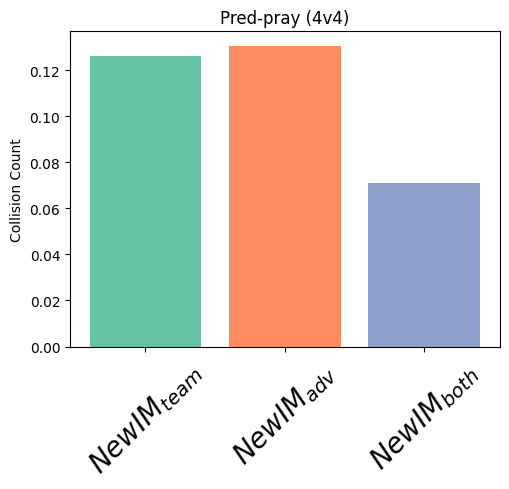

In [21]:
collision_data = {
    'Task': ['Pred-pray (4v4)'],
    'Method': ['$NewIM_{team}$, $NewIM_{adv}$, $NewIM_{both}$'],
    'Collision Count': [
        [0.12599999999999997, 0.13032000000000005, 0.07115999999999967],
    ]
}

n_tasks = len(collision_data['Task'])
n_methods = len(collision_data['Method'][0].split(', '))
color_palette = sns.color_palette("Set2", n_methods)

fig, ax = plt.subplots(figsize=(5*n_tasks, 5))
ax.tick_params(axis='x', labelsize=20)
ax.bar(range(n_methods), collision_data['Collision Count'][0], color=color_palette[:n_methods])
ax.set_xticks(range(n_methods))
ax.set_xticklabels(collision_data['Method'][0].split(', '), rotation=45)
ax.set_title(collision_data['Task'][0])

plt.tight_layout()
plt.ylabel('Collision Count')
plt.savefig('figures/collision_count.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()